Exploring the output files generated by the Salish Sea Atlantis Models

In [2]:
import os
import xarray as xr
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [8]:
# Read in salish sea atlantis output files.
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/5b_TurnPoint_Control/outputSalishSea.nc"
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/5b_TurnPoint_BranchCode/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
data = xr.open_dataset(str(data_file), decode_cf=True)

# Plotting time
oiled_time = np.ma.filled(data.variables['t'], np.nan)
control_time = np.ma.filled(control.variables['t'], np.nan)

# Plot variables
label_size = 11
font_size = 12
line_width = 2

## Species with age structure and reproductive cohorts
Age-structured species (number of cohorts): 
- Benthopelagic (10)                         
- Chinook_salmon (5), Chum_salmon (5), Coho_salmonm (5), Pink_salmon (5), Sockeye_salmon (5), Other_salmonids (8)
- Dogfish (10), Ratfish (10), Rockfish (10), Sixgill (10)                    
- Hake (10)
- Harbor_porpoise (10), Harbor_seals (10)
- Hatchery_Chinook_salmon (3), Hatchery_Coho_salmon (3), Hatchery_Sockeye_salmon (3)
- Humpback_whales (10)
- Large_Demersal_fish (10), Large_Flatfish (10)
- Lingcod (10)
- Orcas_resident (10), Orcas_transient (10)
- Pacific_herring (10)
- Pollock (10)
- Sandlance (7)
- Seabird_gulls (10), Seabirds (10)
- Sealions (10)
- Skates (10)
- Small_Demersal_fish (10), Small_Flatfish (10), Small_pelagic_fish (7)

In [6]:

def total_cohorts_perbox(data, species_name, numCohorts):

    numbers = np.ma.zeros((data.variables[species_name + '1_Nums'].shape),dtype = np.int32)
    structuralN = np.ma.zeros((data.variables[species_name + '1_StructN'].shape),dtype = np.int32)
    reservedN = np.ma.zeros((data.variables[species_name + '1_ResN'].shape),dtype = np.int32)

    for cohort in range (1, numCohorts+1):

        species = species_name + str(cohort)
        
        numbers = numbers + np.ma.filled(data.variables[species + '_Nums'][:,:,:], np.nan)
        structuralN = structuralN + np.ma.filled(data.variables[species +'_StructN'][:,:,:], np.nan)
        reservedN = reservedN + np.ma.filled(data.variables[species +'_ResN'][:,:,:], np.nan)

    numbers = numbers.sum(axis=2)
    structuralN = structuralN.sum(axis=2)
    reservedN = reservedN.sum(axis=2)
    
    return numbers, structuralN, reservedN

def total_boxeslayers(data, control, species):
    
    data_all = np.ma.filled(data.variables[species], np.nan)
    data_all_depths = data_all.sum(axis=2)
    data_all_boxes = data_all_depths.sum(axis=1)
    
    control_all = np.ma.filled(control.variables[species], np.nan)
    control_all_depths = control_all.sum(axis=2)
    control_all_boxes = control_all_depths.sum(axis=1)

    return data_all_boxes, control_all_boxes


def total_perbox(data, control, species, box):
    
    data_per_box = np.ma.filled(data.variables[species][:,box,:], np.nan)
    data_for_box = data_per_box.sum(axis=1)
    
    control_all = np.ma.filled(control.variables[species][:,box,:], np.nan)
    control_for_box = control_all.sum(axis=1)

    return data_for_box, control_for_box


Summing across cohorts

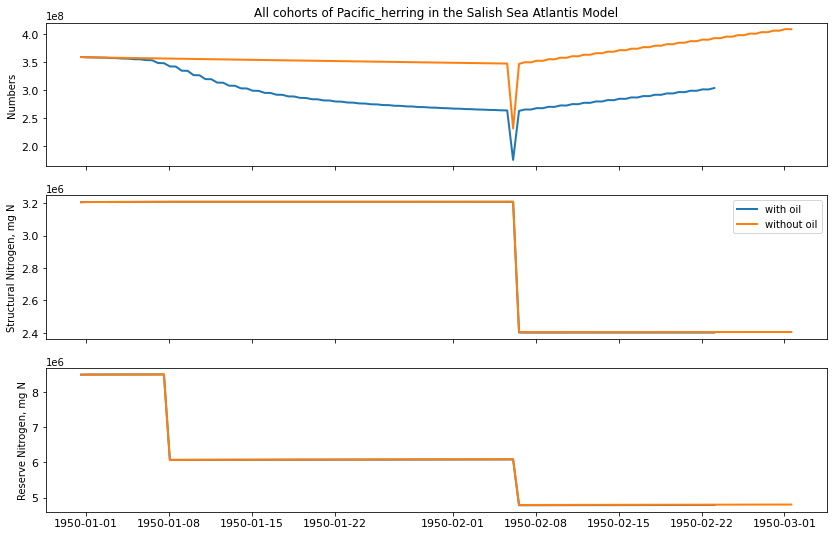

In [22]:
# Exploring species across their cohort

species_name = 'Pacific_herring'
numCohorts = 10

numbers_oiled, structralN_oiled, reservedN_oiled = total_cohorts_perbox(data, species_name, numCohorts)
numbers_control, structralN_control, reservedN_control = total_cohorts_perbox(control, species_name, numCohorts)

# Summed across all boxes
fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
ax[0].plot(oiled_time, numbers_oiled.sum(axis=1), control_time, numbers_control.sum(axis=1), linewidth = line_width)
ax[0].set_title('All cohorts of ' + species_name + ' in the Salish Sea Atlantis Model', fontsize = font_size)
ax[0].set_ylabel('Numbers')
ax[0].tick_params(labelsize=label_size)

ax[1].plot(oiled_time, structralN_oiled.sum(axis=1), control_time, structralN_control.sum(axis=1), linewidth = line_width)
ax[1].set_ylabel('Structural Nitrogen, mg N')
ax[1].tick_params(labelsize=label_size)
ax[1].legend(('with oil', 'without oil'), loc='upper right')

ax[2].plot(oiled_time, reservedN_oiled.sum(axis=1), control_time, reservedN_control.sum(axis=1), linewidth = line_width)
ax[2].set_ylabel('Reserve Nitrogen, mg N')
ax[2].tick_params(labelsize=label_size)

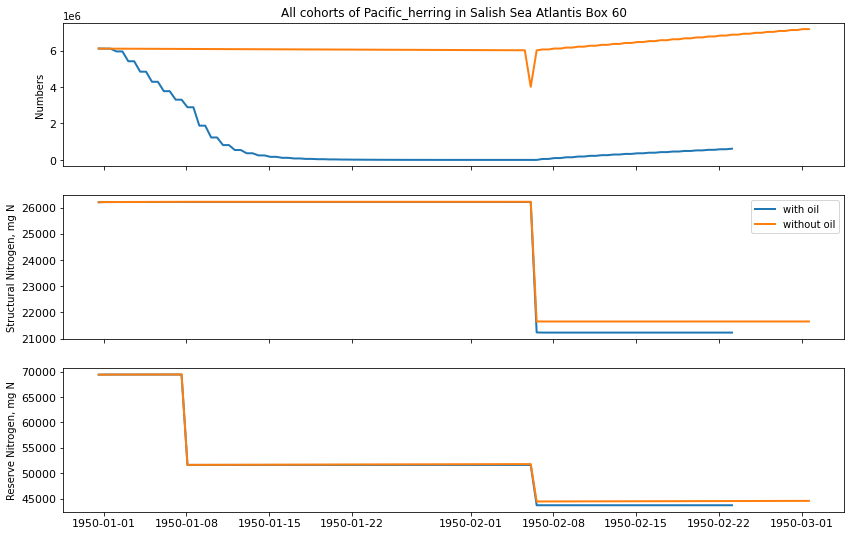

In [23]:
# For a specific box

box = 60

fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
ax[0].plot(oiled_time, numbers_oiled[:,box], control_time, numbers_control[:,box], linewidth = line_width)
ax[0].set_title('All cohorts of ' + species_name + ' in Salish Sea Atlantis Box ' + str(box), fontsize = font_size)
ax[0].set_ylabel('Numbers')
ax[0].tick_params(labelsize=label_size)

ax[1].plot(oiled_time, structralN_oiled[:,box], control_time, structralN_control[:,box], linewidth = line_width)
ax[1].set_ylabel('Structural Nitrogen, mg N')
ax[1].tick_params(labelsize=label_size)
ax[1].legend(('with oil', 'without oil'), loc='upper right')

ax[2].plot(oiled_time, reservedN_oiled[:,box], control_time, reservedN_control[:,box], linewidth = line_width)
ax[2].set_ylabel('Reserve Nitrogen, mg N')
ax[2].tick_params(labelsize=label_size)

Exploring individual cohorts

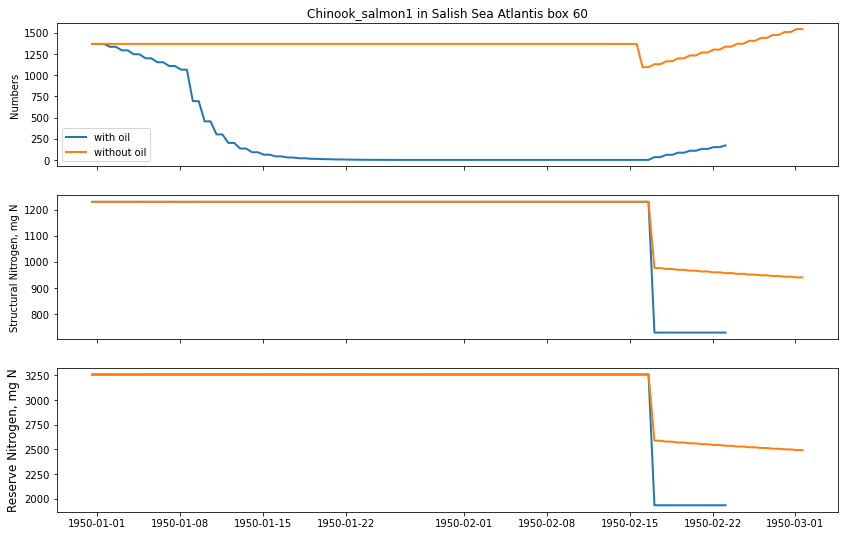

In [24]:
## Use this if you want to explore a specific cohort/species in a specific box

species = 'Chinook_salmon1'
box = 60

oiled_box_num, control_box_num = total_perbox(data, control, species+'_Nums', box)
oiled_box_sN, control_box_sN = total_perbox(data, control, species+'_StructN', box)
oiled_box_rN, control_box_rN = total_perbox(data, control, species+'_ResN', box)

fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
ax[0].plot(oiled_time, oiled_box_num, control_time, control_box_num, linewidth = 2)
ax[0].set_title(species + ' in Salish Sea Atlantis box ' + str(box), fontsize = 12)
ax[0].set_ylabel('Numbers')
ax[0].tick_params(labelsize=10)
ax[0].legend(('with oil', 'without oil'), loc='lower left')

ax[1].plot(oiled_time, oiled_box_sN, control_time, control_box_sN, linewidth = 2)
ax[1].set_ylabel('Structural Nitrogen, mg N')
ax[1].tick_params(labelsize=10)

ax[2].plot(oiled_time, oiled_box_rN, control_time, control_box_rN, linewidth = 2)
ax[2].set_ylabel('Reserve Nitrogen, mg N', fontsize = 12)
ax[2].tick_params(labelsize=10);

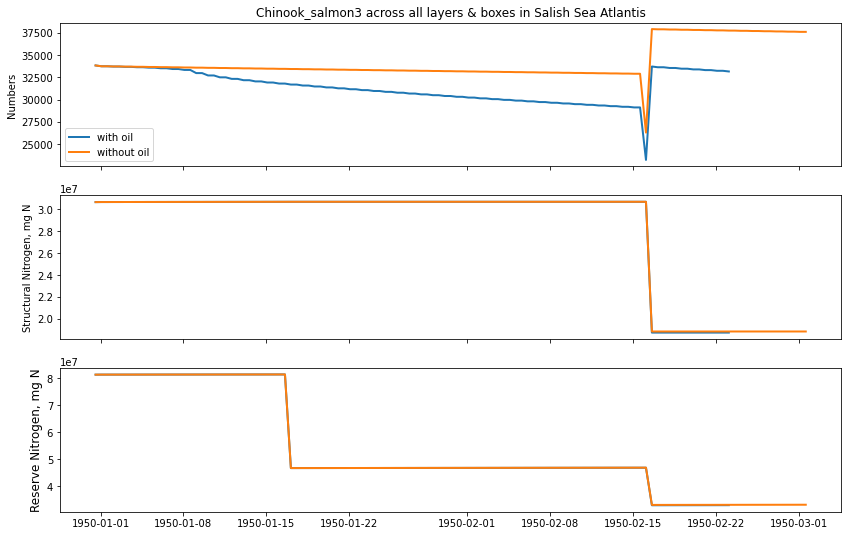

In [12]:
## Use this if you want to explore a specific cohort across all boxes and layers

species_cohort = 'Chinook_salmon3'

data_num, control_num = total_boxeslayers(data, control, species_cohort + '_Nums')
data_sN, control_sN = total_boxeslayers(data, control, species_cohort +'_StructN')
data_rN, control_rN = total_boxeslayers(data, control, species_cohort +'_ResN')

fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
ax[0].plot(oiled_time, data_num, control_time, control_num, linewidth = 2)
ax[0].set_title(species_cohort + ' across all layers & boxes in Salish Sea Atlantis', fontsize = 12)
ax[0].set_ylabel('Numbers')
ax[0].tick_params(labelsize=10)
ax[0].legend(('with oil', 'without oil'), loc='lower left')

ax[1].plot(oiled_time, data_sN, control_time, control_sN, linewidth = 2)
ax[1].set_ylabel('Structural Nitrogen, mg N')
ax[1].tick_params(labelsize=10)

ax[2].plot(oiled_time, data_rN, control_time, control_rN, linewidth = 2)
ax[2].set_ylabel('Reserve Nitrogen, mg N', fontsize = 12);
ax[2].tick_params(labelsize=10)

### Benthic species without age structure
benthic species: Macroalgae, Benthic_grazer, Bivalves, Crabs, Dungeness_crabs, Filter_feeder, Macrobenthos, Seagrass, Sponges

In [24]:


def plot_benthic_timeseries(data, control, species):
    benthic_oiled = np.ma.filled(data.variables[species + '_N'], np.nan)
    benthic_control = np.ma.filled(control.variables[species + '_N'], np.nan)

    benthic_oiled = benthic_oiled.sum(axis=1)
    benthic_control = benthic_control.sum(axis=1)

    fig, ax = plt.subplots(figsize = (14,3)) 
    ax.plot(oiled_time, benthic_oiled, control_time, benthic_control, linewidth = 2)
    ax.set_title('Change in benthic ' + species + ' across all boxes in Salish Sea Atlantis', fontsize = font_size)
    ax.set_ylabel('mg N m-2')
    ax.tick_params(labelsize=label_size)
    ax.legend(('with oil', 'without oil'), loc='lower left')

    return fig, ax

def plot_benthic_timeseries_perbox(data, control, species, box):
    benthic_oiled = np.ma.filled(data.variables[species + '_N'][:,box], np.nan)
    benthic_control = np.ma.filled(control.variables[species + '_N'][:,box], np.nan)

    fig, ax = plt.subplots(figsize = (14,3))
    ax.plot(oiled_time, benthic_oiled, control_time, benthic_control, linewidth = 2)
    ax.set_title('Change in benthic ' + species + ' in Salish Sea Atlantis box ' + str(box), fontsize = font_size)
    ax.set_ylabel('mg N m-2')
    ax.tick_params(labelsize=label_size)
    ax.legend(('with oil', 'without oil'), loc='lower left')

    return fig, ax

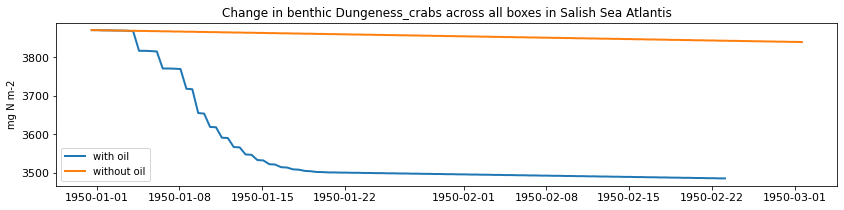

In [25]:
species = 'Dungeness_crabs'
plot_benthic_timeseries(data, control, species);

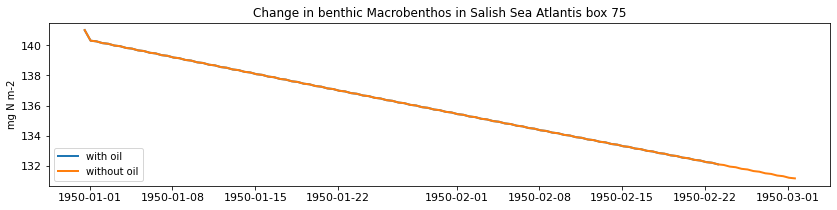

In [26]:
species = 'Macrobenthos'
box = 75
plot_benthic_timeseries_perbox(data, control, species, box);

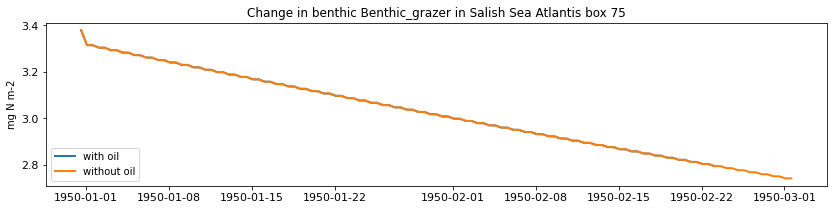

In [27]:
species = 'Benthic_grazer'
box = 75
plot_benthic_timeseries_perbox(data, control, species, box);

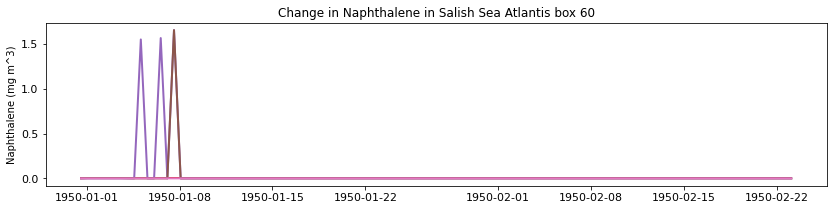

In [30]:
#Other Parameters

parameter = "Naphthalene"
box = 60

param_oiled = np.ma.filled(data.variables[parameter][:,box], np.nan)
#param_control = np.ma.filled(control.variables[parameter][:,box], np.nan)

fig, ax = plt.subplots(figsize = (14,3))
ax.plot(oiled_time, param_oiled, linewidth = 2) #control_time, param_control, 
ax.set_title('Change in ' + parameter + ' in Salish Sea Atlantis box ' + str(box), fontsize = font_size)
ax.set_ylabel(parameter +' (mg m^3)')
ax.tick_params(labelsize=label_size)
#ax.legend(('with oil', 'without oil'), loc='lower left')